In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

## **Praktikum**

Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan :100


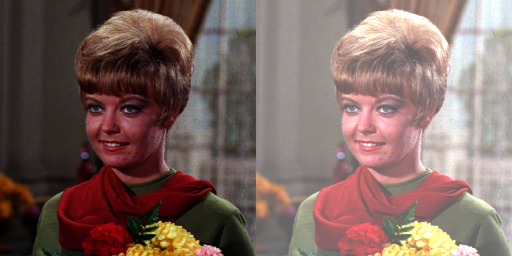

In [8]:
print("Mengubah tingkat kecerahan citra")
print("--------------------------------")
try :
    brightness = int(input("Masukan nilai kecerahan :"))
except ValueError:
    print('Error, not a number')

ori = cv.imread('/content/drive/My Drive/PCVK/Week3/female.tiff')
brig_img = np.zeros(ori.shape, ori.dtype)

#akses per pikse;
for y in range(ori.shape[0]):
    for x in range(ori.shape[1]):
        for c in range(ori.shape[2]):
          brig_img[y,x,c]=np.clip(ori[y,x,c]+brightness, 0,255)

#cara simple tanpa for loop
# brig_img = cv.convertScaleAbs(ori, beta=brightness)

final_frame=cv.hconcat((ori, brig_img))
cv2_imshow(final_frame)

## **Tugas Praktikum**

# 1


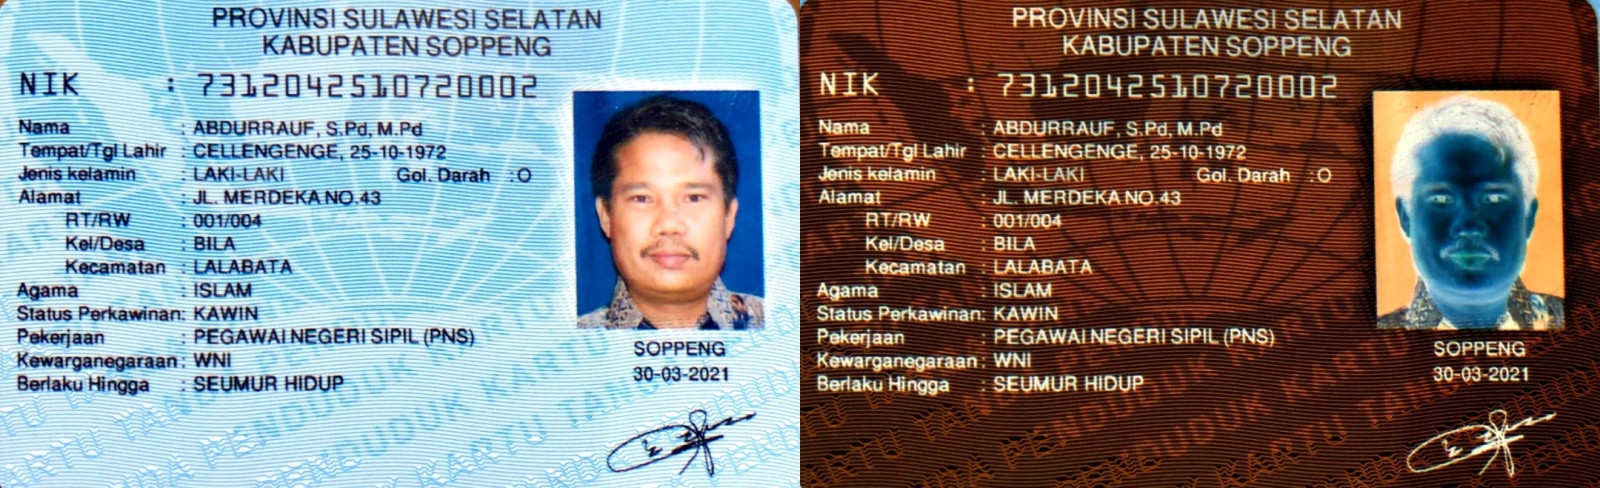

In [43]:
from google.colab.patches import cv2_imshow
ktp = cv.imread('/content/drive/My Drive/PCVK/Week3/KTP.jpg')

# Membuat salinan gambar untuk menghindari perubahan pada gambar asli
ktp_inverse = ktp.copy()

# Mengubah warna asli menjadi kecoklatan dengan menyesuaikan saluran warna
inverted_image = 255 - ktp
# Menampilkan gambar hasil
final_frame = cv.hconcat((ktp, inverted_image))
cv2_imshow(final_frame)



## 2.

Masukan tingkat kecerahan [-255 - 255]: 50
Masukan kontras [1.0 - 3.0]: 2


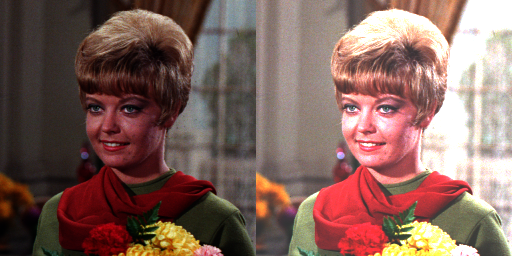

In [45]:
from google.colab.patches import cv2_imshow
import cv2 as cv

try:
    brightness = int(input("Masukan tingkat kecerahan [-255 - 255]: "))
    contrast = float(input("Masukan kontras [1.0 - 3.0]: "))
except ValueError:
    print('Error, input tidak valid')

brightness = max(-255, min(255, brightness))  # Membatasi nilai kecerahan dalam rentang yang valid
contrast = max(1.0, min(3.0, contrast))  # Membatasi nilai kontras dalam rentang yang valid

ori = cv.imread('/content/drive/My Drive/PCVK/Week3/female.tiff')
# Menggunakan rumus untuk mengubah kecerahan dan kontras citra
modified_image = ori.copy()
modified_image = cv.convertScaleAbs(ori, alpha=contrast, beta=brightness)
# Menampilkan citra setelah modifikasi
final_frame = cv.hconcat((ori,modified_image))
cv2_imshow(final_frame)

## 3.

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------
Masukkan tingkat kecerahan: 50


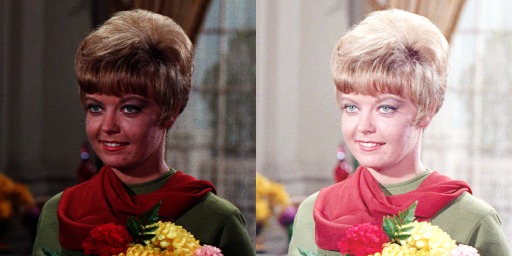

In [44]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------')

try:
  brightness = int(input('Masukkan tingkat kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/My Drive/PCVK/Week3/female.tiff')
transform_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      transform_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])),0,255)

final_frame = cv.hconcat((original, transform_image))
cv2_imshow(final_frame)

## 4(a).Averaging

<ipython-input-75-588be036d223>:20: RuntimeWarning: overflow encountered in ubyte_scalars
  average_color_value = (R + G + B) / 3


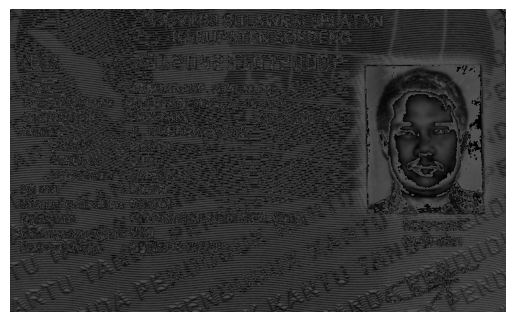

In [75]:
import cv2
from matplotlib import pyplot as plt

# Membaca gambar
img = cv2.imread('/content/drive/My Drive/PCVK/Week3/KTP.jpg')

# Mendapatkan dimensi gambar
height, width, _ = img.shape

# Membuat citra baru untuk menyimpan nilai rata-rata
average_img = img.copy()

# Melakukan perulangan untuk mengakses semua piksel dalam gambar
for y in range(height):
    for x in range(width):
        # Mendapatkan nilai komponen warna (R, G, B) dari piksel pada koordinat (x, y)
        (B, G, R) = img[y, x]

        # Menghitung nilai rata-rata komponen warna (R + G + B) / 3
        average_color_value = (R + G + B) / 3

        # Menyimpan nilai rata-rata sebagai nilai baru pada citra
        average_img[y, x] = [average_color_value, average_color_value, average_color_value]

# Menampilkan citra dengan nilai rata-rata komponen warna dan colormap 'gray'
plt.imshow(average_img, cmap='gray')
plt.axis('off')  # Menghilangkan sumbu
plt.show()





## 4(b).Lightness


<ipython-input-72-368a69a58ca8>:18: RuntimeWarning: overflow encountered in ubyte_scalars
  grayscale_value = (max(pixel) + min(pixel)) // 2


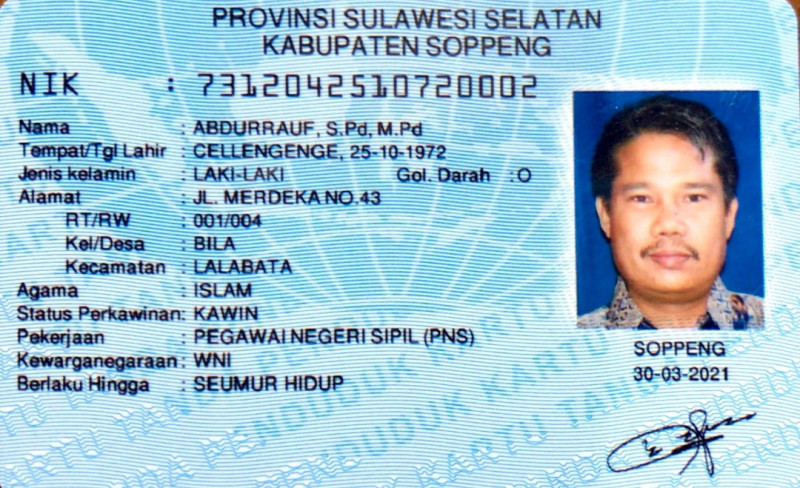

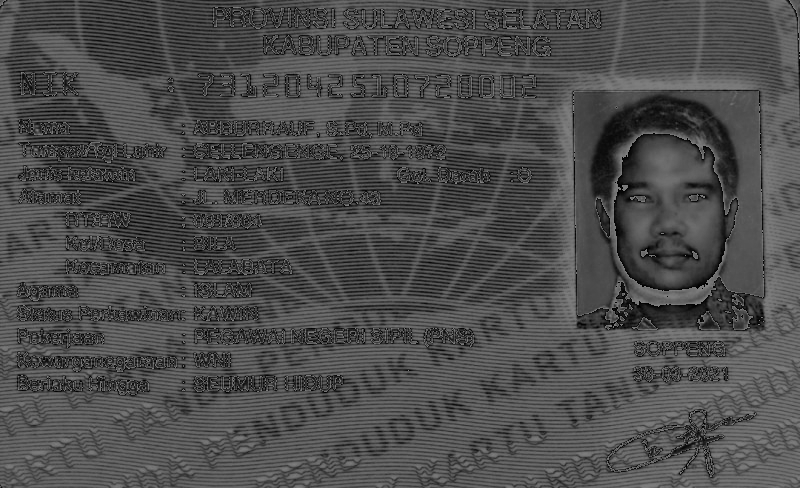

In [72]:
import cv2
# Membaca citra
img = cv.imread('/content/drive/My Drive/PCVK/Week3/KTP.jpg')

# Mendapatkan ukuran citra
height, width, _ = img.shape

# Membuat array kosong untuk citra grayscale
gray_img = np.zeros((height, width), dtype=np.uint8)

# Looping melalui setiap piksel citra
for i in range(height):
    for j in range(width):
        # Ambil komponen warna RGB dari piksel
        pixel = img[i, j]

        # Hitung nilai lightness untuk piksel
        grayscale_value = (max(pixel) + min(pixel)) // 2

        # Set nilai grayscale pada citra grayscale
        gray_img[i, j] = grayscale_value

# Menampilkan
cv2_imshow(img)
cv2_imshow(gray_img)

## 4(c).Luminance

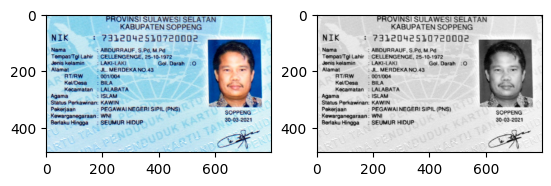

In [64]:
img_lum = cv.imread('/content/drive/My Drive/PCVK/Week3/KTP.jpg')
img_rgb = cv.cvtColor(img_lum,cv.COLOR_BGR2RGB)
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')

## 5

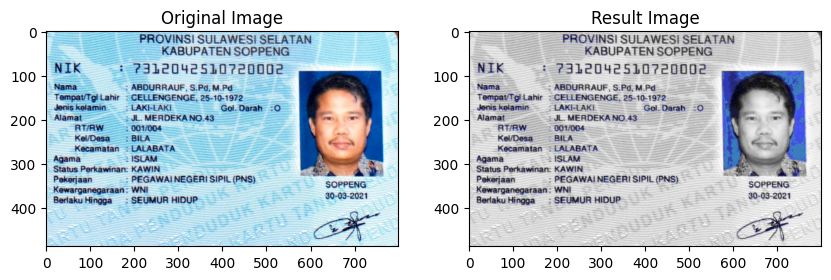

In [79]:
img = cv.imread('/content/drive/My Drive/PCVK/Week3/KTP.jpg')

hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
lower_blue = np.array([100, 150, 0])
upper_blue = np.array([150, 260, 255])

mask = cv.inRange(hsv_img, lower_blue, upper_blue)
color_img = cv.bitwise_and(img, img, mask=mask)

gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_img = cv.cvtColor(gray_img, cv.COLOR_GRAY2BGR)
result_img = cv.bitwise_or(color_img, gray_img)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
plt.title('Result Image')
plt.show()
